# Comparing Happiness by Language

Import necessary libraries:

In [16]:
import pandas as pd
import numpy as np
import sys, os, colorsys
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
sns.set(style="white", color_codes=True)

Create a dictionary of dataframes for each language:

In [63]:
all_languages = ["arabic", "chinese", "english", "french", "german", "indonesian", "korean", "portuguese", "russian", "spanish"]
all_data = {}

for language in all_languages:
    word_path = os.path.join(os.path.abspath(os.pardir), 
                         'languages/data', 'labMTwords-'+language+'.csv')
    word = pd.read_csv(word_path, names = ["word"])
    score_path = os.path.join(os.path.abspath(os.pardir), 
                         'languages/data', 'labMTscores-'+language+'.csv')
    score = pd.read_csv(score_path, names = ["score"])
    # This is not currently being added to the data frame:
    std_path = os.path.join(os.path.abspath(os.pardir), 
                         'languages/data', 'labMTscoresStd-'+language+'.csv')
    std = pd.read_csv(std_path, names = ["std"])
    data = pd.merge(word, score, left_index=True, right_index=True)
    all_data[language] = data

In [91]:
all_data['arabic']['word']

['الجنة',
 'سعادة',
 'الله',
 'السعادة',
 'الحب',
 'الضحك',
 'حبيبى',
 'ضحك',
 'لله',
 'سعداء',
 'سعيدا',
 'احبك',
 'ناجح',
 'أضحك',
 'حبيبتى',
 'أمي',
 'سرور',
 'سعيده',
 'المضحك',
 'امي',
 'الفوز',
 'حبيبتي',
 'الملائكة',
 'يضحك',
 'مضحكة',
 'نجحت',
 'بسعادة',
 'النجاح',
 'العيد',
 'الزفاف',
 'سعيدة',
 'بالله',
 'ماما',
 'رائع',
 'والدتي',
 'أمى',
 'نجاح',
 'سعيد',
 'الأم',
 'حبيب',
 'تضحك',
 'حب',
 'المرح',
 'مرح',
 'نجحنا',
 'مضحك',
 'ممتاز',
 'أحبك',
 'مسرورة',
 'رائعة',
 'مبروك',
 'رائعا',
 'تحبنى',
 'أطفالي',
 'السعيد',
 'بالحب',
 'أصدقائى',
 'الجميلة',
 'حبي',
 'love',
 'حبيبي',
 'ممتازة',
 'الإحتفال',
 'بالسعادة',
 'تحبك',
 'الحرية',
 'متعة',
 'الأمان',
 'السعيدة',
 'الجميلات',
 'أجازة',
 'الرائعة',
 'الرب',
 'ربحت',
 'جميلة',
 'والدتك',
 'ممتعة',
 'رائعون',
 'حبك',
 'الورود',
 'الاحتفال',
 'الام',
 'يفوز',
 'ممتع',
 'ينجح',
 'والدى',
 'الفائز',
 'امى',
 'يحبك',
 'حفلة',
 'لأمي',
 'الصلاة',
 'أبي',
 'مسرور',
 'ربي',
 'محظوظين',
 'يحب',
 'الاطفال',
 'يحبني',
 'والداي',
 'رائعين

Let's set our default sizes for matplotlib using `rcParams`:

In [64]:
size = 20
plt.rcParams['figure.figsize'] = ((size*2)/3, size/2)
plt.rcParams['axes.titlesize'] = size
plt.rcParams['axes.titlepad'] = size
plt.rcParams['axes.labelsize'] = (size*2)/3
plt.rcParams['axes.labelpad'] = size/2
plt.rcParams['legend.fontsize'] = 10

Comparing histograms of particular language happiness scores:

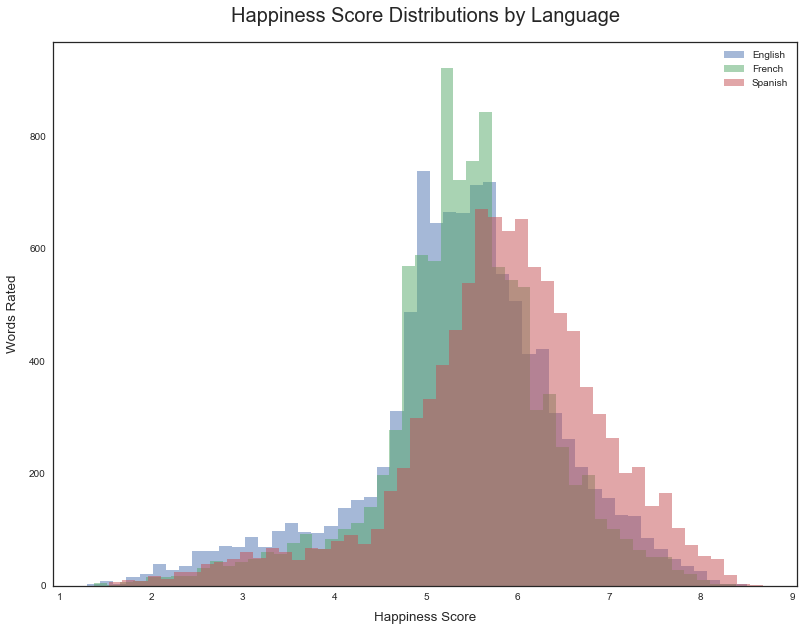

In [65]:
bins = 50
languages = ['english', 'french', 'spanish']
for language in languages:
    plt.hist(all_data[language]['score'], bins, alpha=0.5, label=str.title(language))
plt.legend()
plt.title('Happiness Score Distributions by Language')
plt.ylabel('Words Rated')
plt.xlabel('Happiness Score')
plt.show()

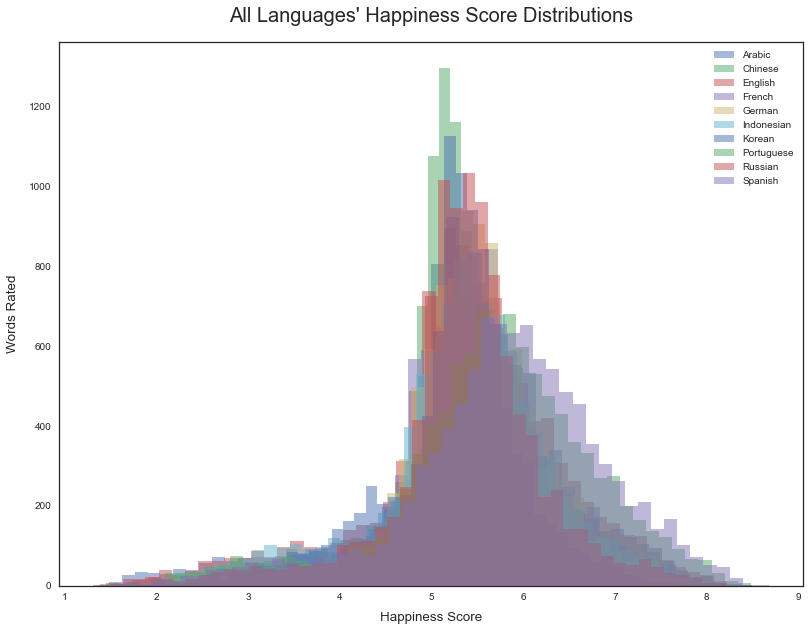

In [66]:
bins = 50
languages = all_languages
for language in languages:
    plt.hist(all_data[language]['score'], bins, alpha=0.5, label=str.title(language))
plt.legend(loc='upper right')
plt.title('All Languages\' Happiness Score Distributions')
plt.ylabel('Words Rated')
plt.xlabel('Happiness Score')
plt.show()

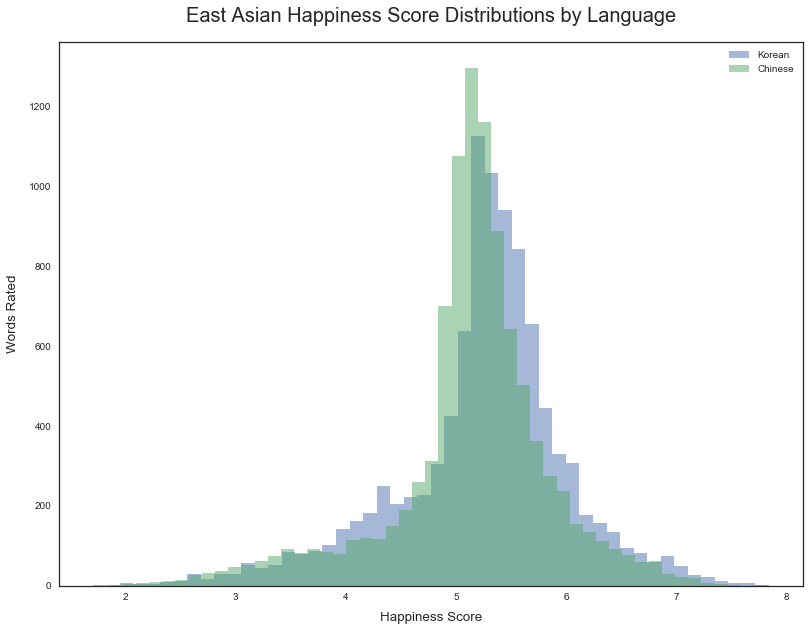

In [67]:
bins = 50
languages = ['korean', 'chinese']
for language in languages:
    plt.hist(all_data[language]['score'], bins, alpha=0.5, label=str.title(language))
plt.legend(loc='upper right')

plt.title('East Asian Happiness Score Distributions by Language')
plt.ylabel('Words Rated')
plt.xlabel('Happiness Score')

plt.show()

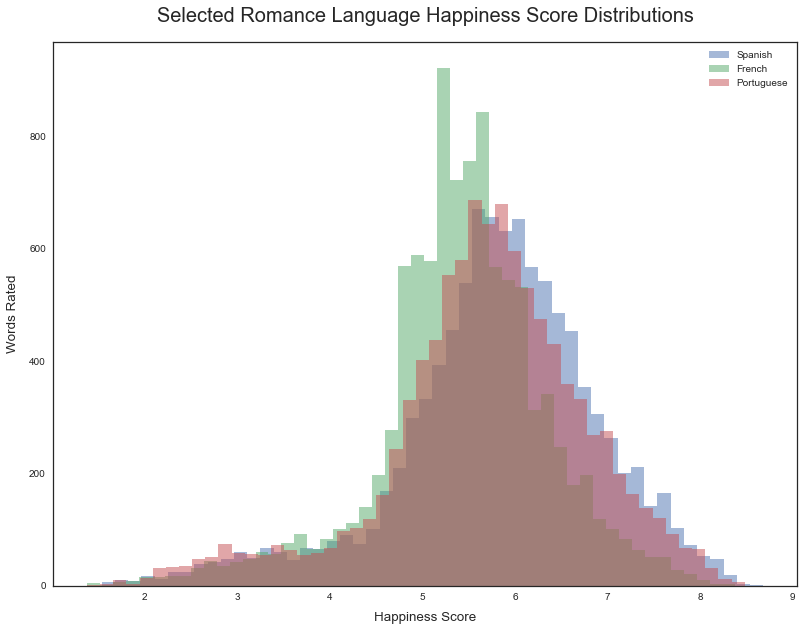

In [68]:
bins = 50
languages = ['spanish', 'french', 'portuguese']
for language in languages:
    plt.hist(all_data[language]['score'], bins, alpha=0.5, label=str.title(language))
plt.legend(loc='upper right')

plt.title('Selected Romance Language Happiness Score Distributions')
plt.ylabel('Words Rated')
plt.xlabel('Happiness Score')

plt.show()

In [69]:
compare_scores = pd.DataFrame(columns=all_data)

for language in all_data:
    compare_scores[language] = all_data[language]['score']

compare_scores.head(10)

,arabic,chinese,english,french,german,indonesian,korean,portuguese,russian,spanish
0,8.50,7.82,8.50,8.38,8.14,8.42,7.84,8.48,8.22,8.68
1,8.38,7.56,8.44,8.34,8.00,8.26,7.84,8.46,8.22,8.60
2,8.38,7.54,8.42,8.34,7.96,8.14,7.80,8.46,8.20,8.48
3,8.24,7.48,8.30,8.30,7.94,8.14,7.64,8.42,8.20,8.42
4,8.18,7.46,8.26,8.16,7.94,8.14,7.62,8.38,8.16,8.42
5,8.14,7.42,8.22,8.14,7.92,8.10,7.62,8.38,8.12,8.38
6,8.10,7.40,8.20,8.12,7.92,8.06,7.62,8.36,8.10,8.38
7,8.10,7.40,8.18,8.12,7.90,8.06,7.60,8.30,8.10,8.36
8,8.08,7.38,8.18,8.08,7.90,8.04,7.60,8.28,8.08,8.34
9,8.08,7.34,8.16,8.06,7.90,8.04,7.58,8.26,8.08,8.34


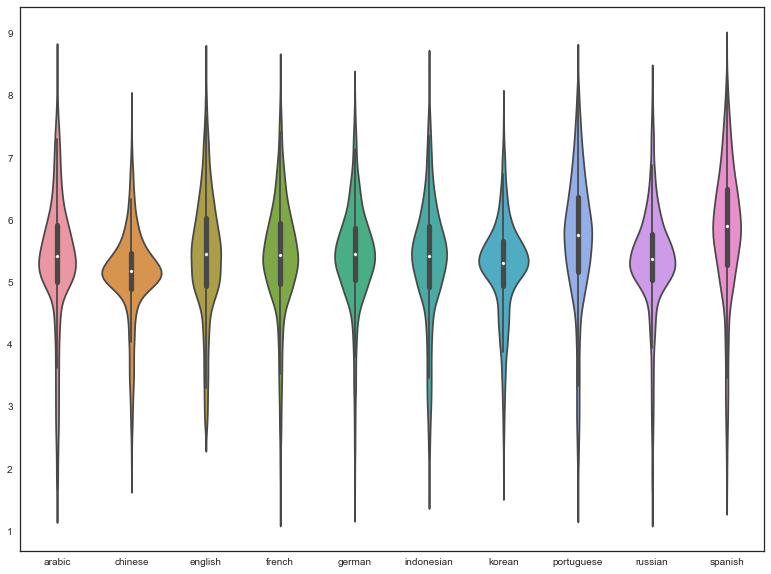

In [70]:
sns.violinplot(compare_scores)

In [38]:
searchwords = ['laugh', 'happ', 'haha']
searchlanguage = 'english'

def search(words, language):
    print("Searching the "+str.title(language)+" words for instances of "+str(words)+":\n")
    
    for item in words:
        
        r = {\
             'word': all_data[language]['word'],\
             'found': all_data[language]['word'].str.find(item),\
             'score': all_data[language]['score']}

        results = pd.DataFrame(data=r)
    
        print(str('Searching for "'+item+'":'))
        
        sumscores = 0
        count = 0
        index = 0
        for result in results["found"]:
            if result >-1:
                count+=1
                sumscores = sumscores+results["score"][index]
                print(r["word"][index],r["score"][index])
            index+=1
            
        print("Average score:", sumscores/count)
        print()
        
        
#search(searchwords, searchlanguage)

In [86]:
all_languages = ["arabic", "chinese", "french", "german", "indonesian", "korean", "portuguese", "russian", "spanish"]

all_ratings = {}

for language in all_languages:
    ratings_path = os.path.join(os.path.abspath(os.pardir), 
                         'languages/ratings-share/'+language+'/', 'master.csv')
    ratings = pd.read_csv(ratings_path, header=None, names=['words'])
    all_ratings[language] = ratings
    
all_ratings['arabic']

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,words
ألو,5,6,6,5,8,6,5,5,5,5,6,5,7,6,5,5,8,6,6,6,6,6,6,6,5,6,6,5,5,7,5,6,6,7,5,5,5,6,5,5,5,6,5,5,5,6,4,5,7,5
لست,4,3,4,4,8,4,5,5,4,5,4,4,4,5,5,6,5,4,5,5,4,5,5,4,5,4,5,5,4,5,5,5,5,5,6,5,4,6,3,4,5,5,5,5,5,5,5,5,5,5
متى,5,4,5,4,7,5,3,4,5,5,4,5,4,5,5,5,5,5,5,5,5,4,5,5,6,5,5,5,5,5,5,5,5,5,7,4,5,6,4,5,5,5,5,5,6,5,5,5,5,4
باى,6,7,6,5,5,4,9,6,6,5,4,7,9,4,4,4,1,5,7,9,6,5,6,7,4,5,4,6,6,5,5,3,5,5,6,4,5,5,6,4,6,5,3,5,5,5,6,5,5,7
هيي,5,5,5,5,5,4,6,3,5,5,4,5,5,5,8,5,5,5,6,6,5,5,5,5,6,5,5,5,6,5,3,5,5,5,6,6,5,5,5,5,5,6,8,5,6,5,7,5,7,5
بـ,5,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,1,5,5,5,1,5,5,5,5,5,6,5,5,5,5,5
إما,5,5,5,5,5,5,6,5,5,5,5,5,5,5,5,5,5,5,1,5,5,5,5,6,5,3,4,8,5,5,5,5,5,5,5,5,5,5,6,5,5,5,5,5,5,5,5,5,5,5
كول,5,5,8,7,5,6,5,5,7,7,8,5,6,9,5,5,6,5,5,5,5,6,5,7,5,5,5,9,5,6,9,5,5,7,5,6,5,7,5,7,5,4,6,5,6,5,7,5,4,5
قوم,5,6,3,4,5,5,5,5,4,5,8,5,5,6,6,4,5,5,5,5,4,6,6,6,5,6,5,5,6,5,5,5,6,5,6,5,6,5,5,5,5,5,5,5,5,5,5,7,5,5
لطف,7,7,7,6,8,7,9,9,6,7,7,6,6,7,6,8,7,7,5,6,7,7,7,7,8,6,5,6,7,8,7,7,6,6,6,7,7,6,5,8,7,8,6,7,7,7,8,7,8,7
